# Cowpea Vegetable Data Yield Analysis

## Library Import

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import os
from scipy import stats
from tabulate import tabulate
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from simple_colors import *
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [177]:
df = pd.read_csv('Data_Yield.csv')

In [210]:
cowpea_yield_df = pd.read_csv('Data_Yield.csv')
cowpea_yield_df.info()
cowpea_yield_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Treatments     20 non-null     object 
 1   GY_PER_20      20 non-null     float64
 2   POD_LENGTH_65  20 non-null     float64
 3   POD_PLANT_60   20 non-null     float64
 4   POD_SCORE      20 non-null     int64  
 5   MVF_INF        20 non-null     int64  
 6   MSJ_OBS_1ST    20 non-null     float64
 7   MSJ_OBS_2ND    20 non-null     float64
 8   MSJ_OBS_3RD    20 non-null     float64
 9   MSJ_OBS_4TH    20 non-null     float64
 10  MSJ_OBS_12TH   20 non-null     float64
 11  ACINF_OBS_1ST  20 non-null     float64
 12  ACINF_OBS_2ND  20 non-null     float64
 13  ACINF_OBS_3RD  20 non-null     float64
 14  ACINF_OBS_4TH  20 non-null     float64
 15  ACINF_OBS_5TH  20 non-null     float64
 16  ACINF_OBS_6TH  20 non-null     float64
 17  NP_Grain (g)   20 non-null     int64  
dtypes: float64(1

,GY_PER_20,POD_LENGTH_65,POD_PLANT_60,POD_SCORE,MVF_INF,MSJ_OBS_1ST,MSJ_OBS_2ND,MSJ_OBS_3RD,MSJ_OBS_4TH,MSJ_OBS_12TH,ACINF_OBS_1ST,ACINF_OBS_2ND,ACINF_OBS_3RD,ACINF_OBS_4TH,ACINF_OBS_5TH,ACINF_OBS_6TH,NP_Grain (g)
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,23.26750,16.017500,11.015000,2.150000,21.750000,2.562500,2.660000,2.460000,2.500000,2.587500,0.035000,1.837500,2.667500,3.147500,3.265000,3.465000,306.800000
std,6.92439,1.990852,2.750794,0.933302,8.315331,0.182003,0.258335,0.188205,0.203909,0.204473,0.063037,0.730514,0.680223,0.283528,0.292494,0.292494,123.121506
min,10.90000,11.450000,5.800000,1.000000,5.000000,2.200000,2.100000,2.050000,2.050000,2.200000,0.000000,0.450000,1.500000,2.700000,2.800000,3.000000,110.000000
25%,19.66250,15.225000,9.850000,1.750000,15.000000,2.437500,2.487500,2.387500,2.350000,2.437500,0.000000,1.637500,2.375000,3.000000,3.075000,3.275000,217.500000
50%,22.55000,16.500000,11.550000,2.000000,22.500000,2.625000,2.650000,2.500000,2.525000,2.600000,0.000000,2.100000,2.900000,3.100000,3.300000,3.450000,323.000000
75%,27.36250,17.512500,12.562500,3.000000,26.250000,2.700000,2.862500,2.612500,2.650000,2.700000,0.050000,2.325000,3.112500,3.400000,3.425000,3.725000,371.000000
max,36.10000,18.500000,15.650000,4.000000,35.000000,2.800000,3.050000,2.700000,2.850000,3.000000,0.200000,2.700000,3.500000,3.700000,3.800000,3.900000,540.000000


## Data Normalization

In [211]:
numerical_cols = cowpea_yield_df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
cowpea_yield_df[numerical_cols] = scaler.fit_transform(cowpea_yield_df[numerical_cols])
cowpea_yield_df.head()


,Treatments,GY_PER_20,POD_LENGTH_65,POD_PLANT_60,POD_SCORE,MVF_INF,MSJ_OBS_1ST,MSJ_OBS_2ND,MSJ_OBS_3RD,MSJ_OBS_4TH,MSJ_OBS_12TH,ACINF_OBS_1ST,ACINF_OBS_2ND,ACINF_OBS_3RD,ACINF_OBS_4TH,ACINF_OBS_5TH,ACINF_OBS_6TH,NP_Grain (g)
0,A,0.414683,0.780142,1.000000,0.666667,0.833333,0.750000,0.368421,0.615385,0.6250,0.5625,0.5,0.177778,0.00,0.40,0.9,0.777778,0.567442
1,A,0.319444,0.730496,0.644670,0.666667,0.666667,0.333333,0.842105,0.230769,1.0000,0.5000,0.0,1.000000,0.80,1.00,0.7,0.333333,0.502326
2,A,0.436508,0.886525,0.670051,0.333333,0.166667,0.000000,0.421053,0.615385,0.3750,0.6250,0.0,0.688889,0.55,0.40,0.2,0.000000,0.400000
3,A,0.357143,0.539007,0.411168,0.333333,0.333333,0.750000,0.578947,0.000000,0.2500,0.6250,0.0,0.733333,0.65,0.00,0.2,0.555556,0.265116
4,B,0.436508,0.695035,0.649746,0.333333,0.500000,0.666667,0.368421,0.923077,0.3125,0.4375,1.0,0.066667,0.05,0.45,0.8,0.888889,0.590698


## Data Segmentation

In [220]:
output_directory = 'Table'
os.makedirs(output_directory, exist_ok=True)

segments = cowpea_yield_df['Treatments'].unique()
segmented_data = {segment: cowpea_yield_df[cowpea_yield_df['Treatments'] == segment] for segment in segments}

for segment, data in segmented_data.items():
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = data[numerical_cols].round(2)
    file_path = os.path.join(output_directory, f'{segment}_segment_data.csv')   
    data.to_csv(file_path, index=False)
    print(f"Segment: {segment}")
    print(data.head())


Segment: A
  Treatments  GY_PER_20  POD_LENGTH_65  POD_PLANT_60  POD_SCORE  MVF_INF   
0          A       0.41           0.78          1.00       0.67     0.83  \
1          A       0.32           0.73          0.64       0.67     0.67   
2          A       0.44           0.89          0.67       0.33     0.17   
3          A       0.36           0.54          0.41       0.33     0.33   

   MSJ_OBS_1ST  MSJ_OBS_2ND  MSJ_OBS_3RD  MSJ_OBS_4TH  MSJ_OBS_12TH   
0         0.75         0.37         0.62         0.62          0.56  \
1         0.33         0.84         0.23         1.00          0.50   
2         0.00         0.42         0.62         0.38          0.62   
3         0.75         0.58         0.00         0.25          0.62   

   ACINF_OBS_1ST  ACINF_OBS_2ND  ACINF_OBS_3RD  ACINF_OBS_4TH  ACINF_OBS_5TH   
0            0.5           0.18           0.00            0.4            0.9  \
1            0.0           1.00           0.80            1.0            0.7   
2           

## Label Encoding

In [140]:
encode = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in encode:
    df[col] = encoder.fit_transform(df[col])
df.head()


,Treatments,GY_PER_20,POD_LENGTH_65,POD_PLANT_60,POD_SCORE,MVF_INF,MSJ_OBS_1ST,MSJ_OBS_2ND,MSJ_OBS_3RD,MSJ_OBS_4TH,MSJ_OBS_12TH,ACINF_OBS_1ST,ACINF_OBS_2ND,ACINF_OBS_3RD,ACINF_OBS_4TH,ACINF_OBS_5TH,ACINF_OBS_6TH,NP_Grain (g)
0,0,21.35,16.95,15.65,3,30,2.65,2.45,2.45,2.55,2.65,0.1,0.85,1.5,3.10,3.7,3.7,354
1,0,18.95,16.60,12.15,3,25,2.40,2.90,2.20,2.85,2.60,0.0,2.70,3.1,3.70,3.5,3.3,326
2,0,21.90,17.70,12.40,2,10,2.20,2.50,2.45,2.35,2.70,0.0,2.00,2.6,3.10,3.0,3.0,282
3,0,19.90,15.25,9.85,2,15,2.65,2.65,2.05,2.25,2.70,0.0,2.10,2.8,2.70,3.0,3.5,224
4,1,21.90,16.35,12.20,2,20,2.60,2.45,2.65,2.30,2.55,0.2,0.60,1.6,3.15,3.6,3.8,364


## Data Virtualization

### Histogram

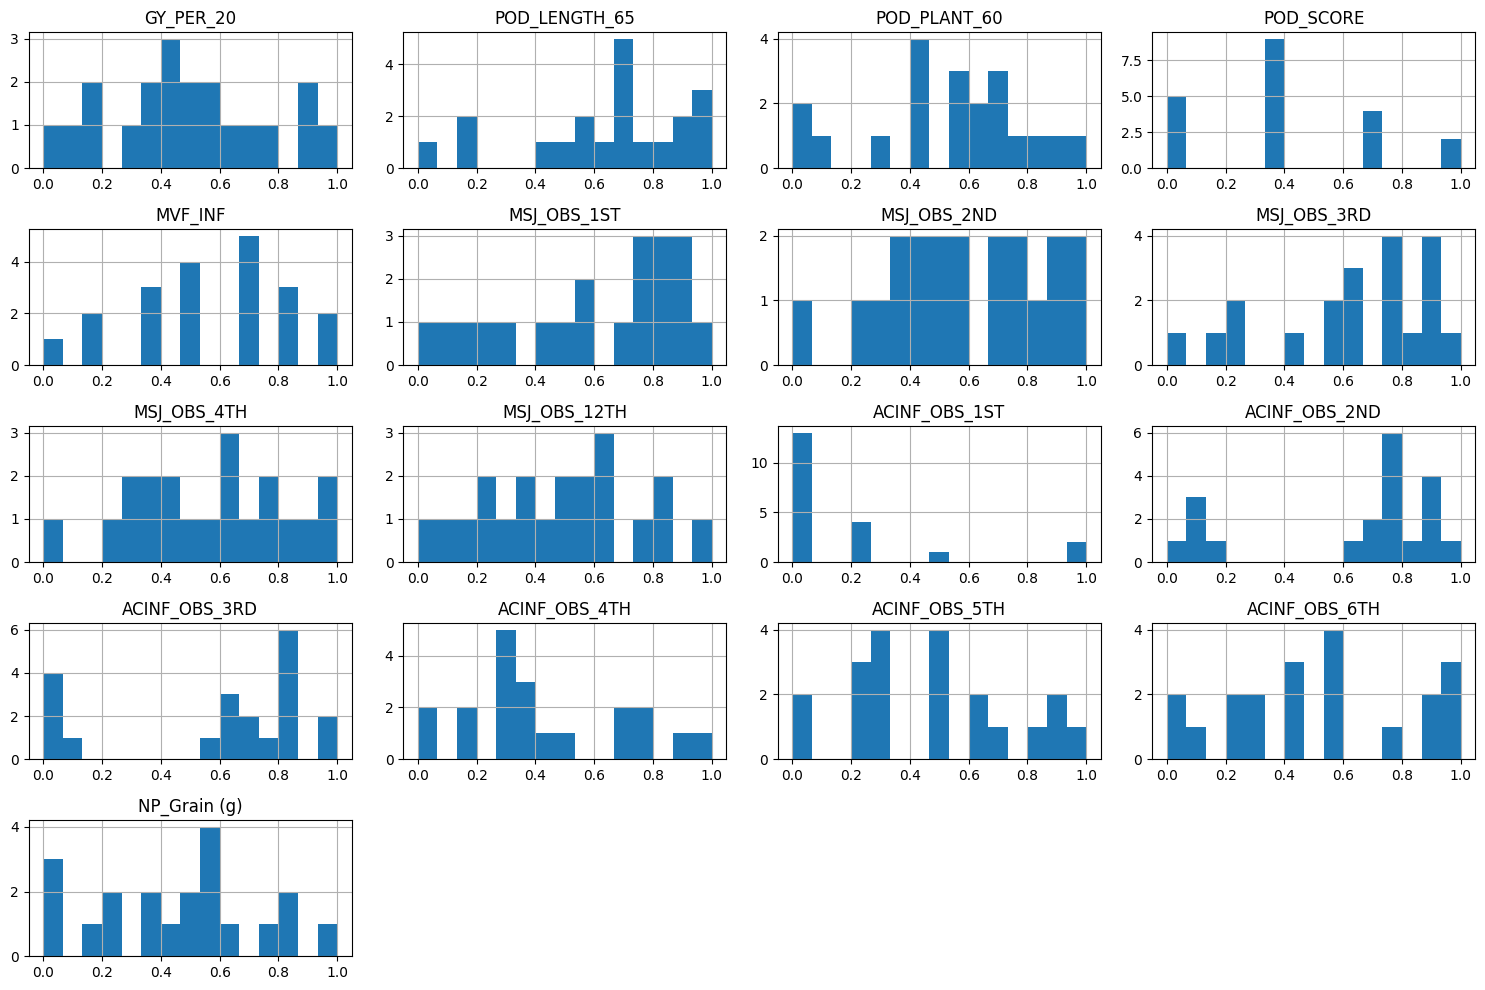

In [44]:
cowpea_yield_df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
#plt.suptitle('Histograms Plot', y=1.02)
plt.show()

### Boxplot distribution of crop 

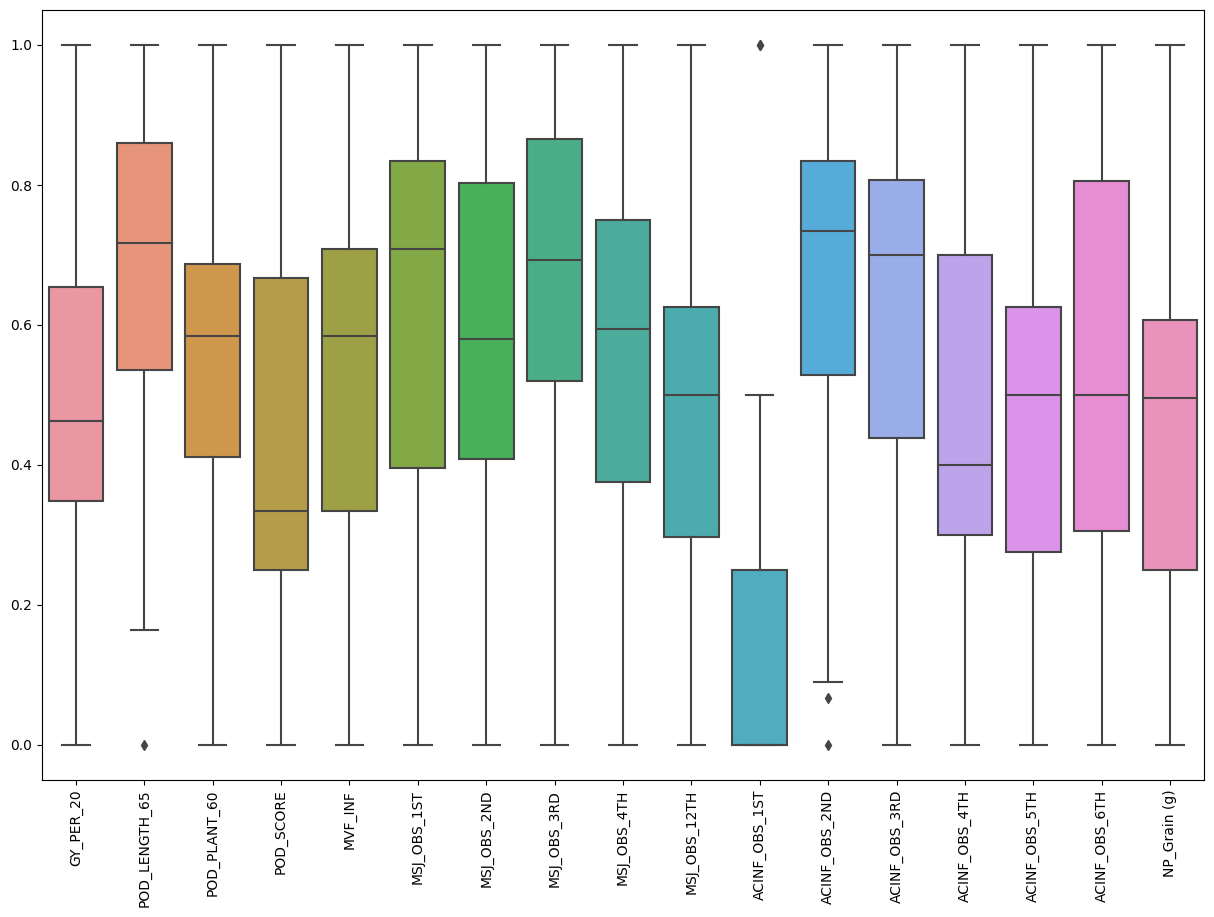

In [144]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=cowpea_yield_df)
plt.xticks(rotation=90) 
plt.show()

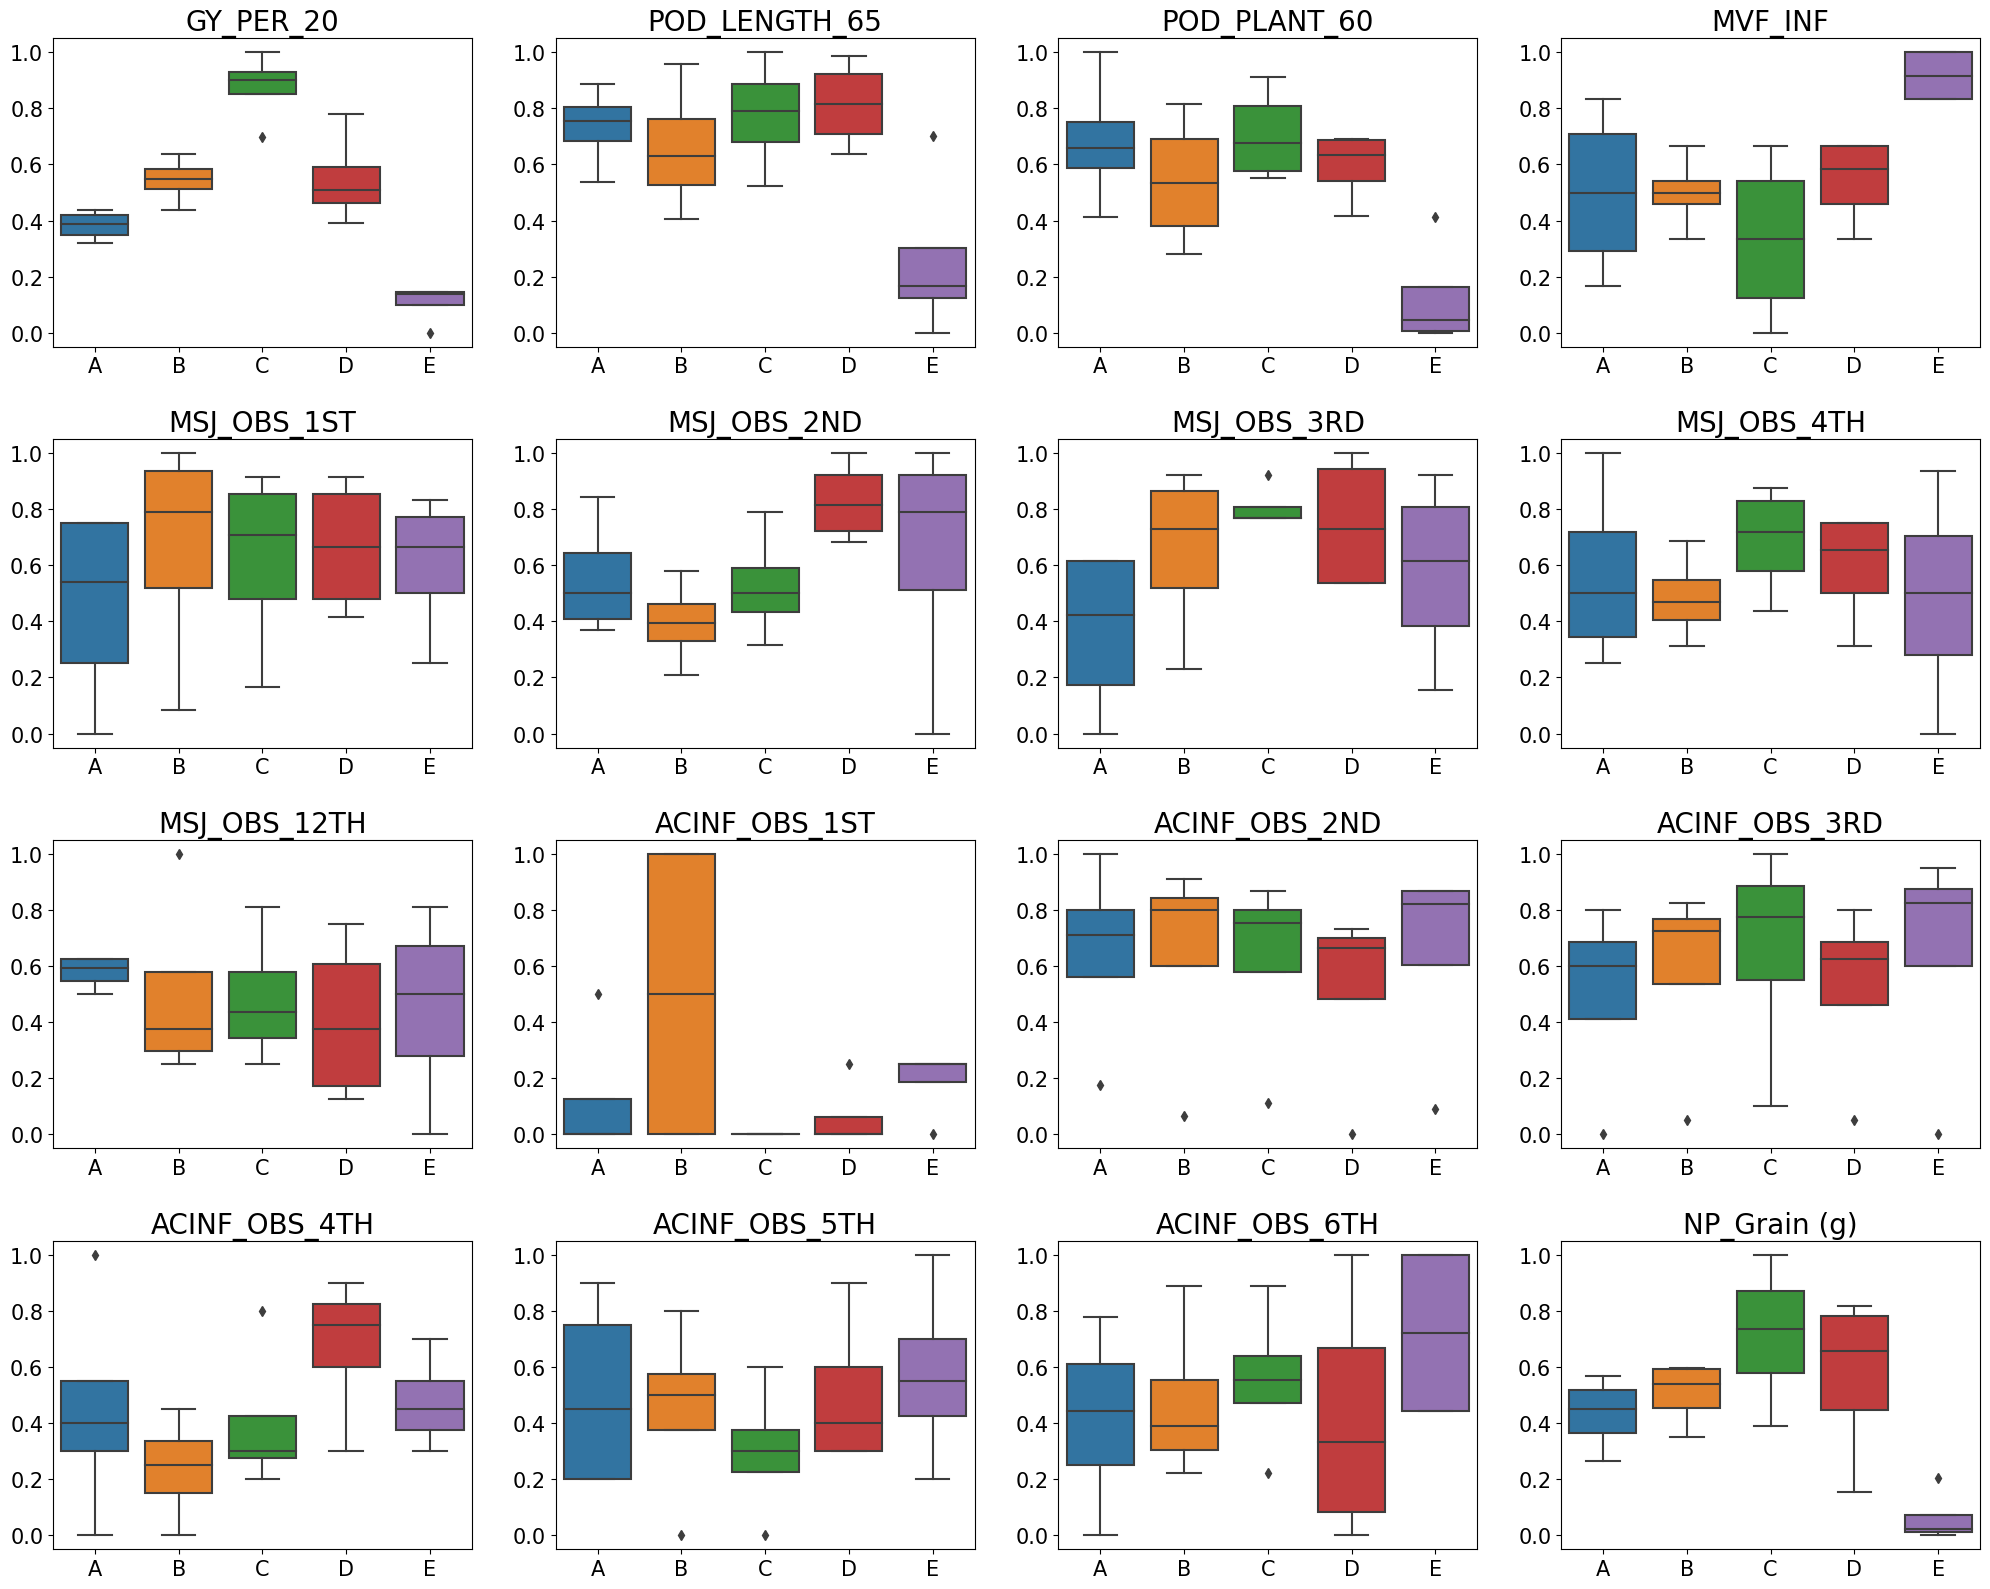

In [64]:
numerical_cols = cowpea_yield_df.drop('POD_SCORE', axis=1).select_dtypes(
    include=['float64', 'int64']).columns
ncols = 4
nrows = math.ceil(len(numerical_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4 * nrows))

axes = axes.flatten()

for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x='Treatments', y=col, data=cowpea_yield_df, ax=ax)
    ax.set_title(f'{col}', fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

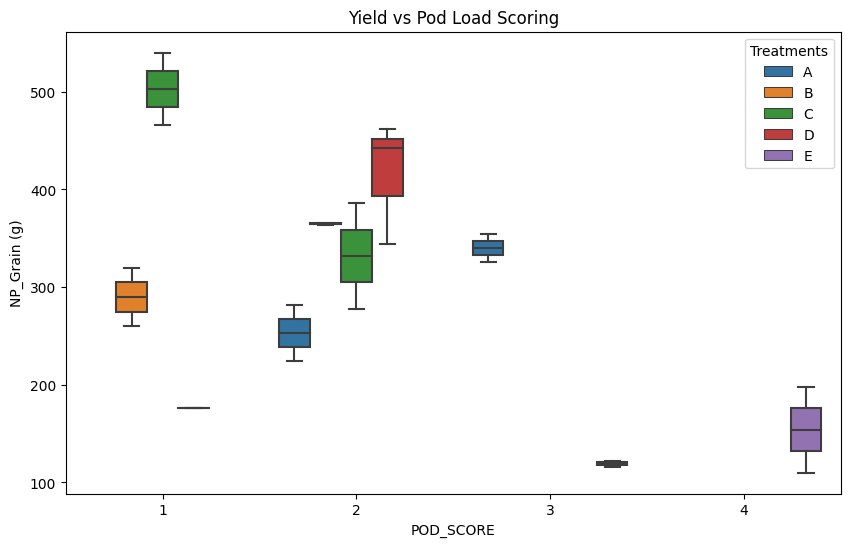

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='POD_SCORE', y='NP_Grain (g)', hue='Treatments', data=df)
plt.title('Yield vs Pod Load Scoring')
plt.show()



### Correlation Heatmap

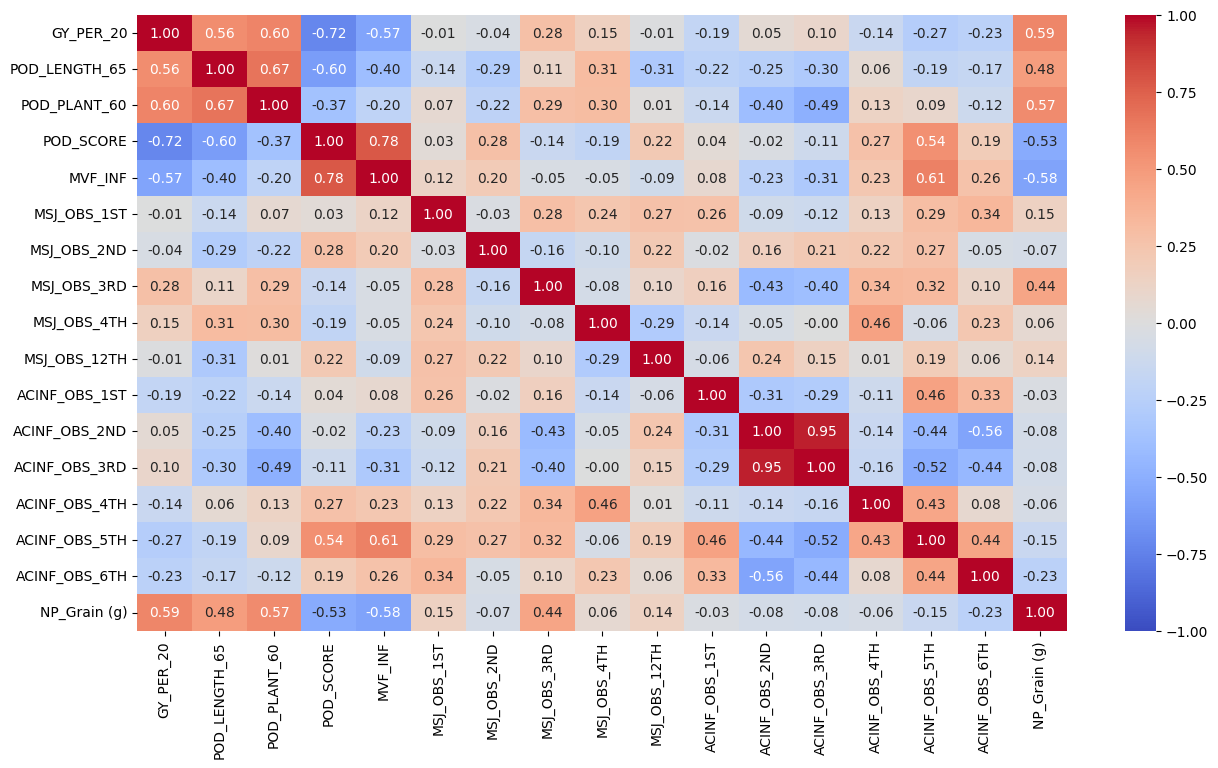

In [38]:
co = cowpea_yield_df.drop('Treatments', axis=1)
plt.figure(figsize=(15, 8))
sns.heatmap(co.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1, fmt='.2f')
plt.show()


               NP_Grain (g)  POD_LENGTH_65  POD_PLANT_60  POD_SCORE
NP_Grain (g)       1.000000       0.478165      0.566587  -0.525997
POD_LENGTH_65      0.478165       1.000000      0.665578  -0.601998
POD_PLANT_60       0.566587       0.665578      1.000000  -0.373008
POD_SCORE         -0.525997      -0.601998     -0.373008   1.000000


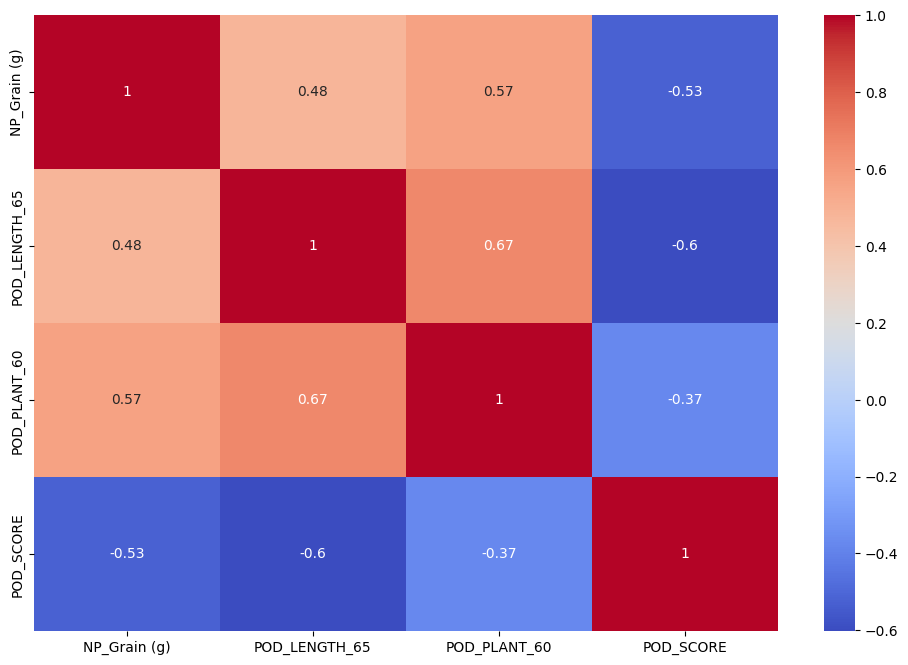

In [124]:
correlation_columns = ['NP_Grain (g)', 'POD_LENGTH_65', 
                       'POD_PLANT_60', 'POD_SCORE']
correlation_matrix = cowpea_yield_df[correlation_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Heatmap')
plt.show()


### Scatter plot distribution

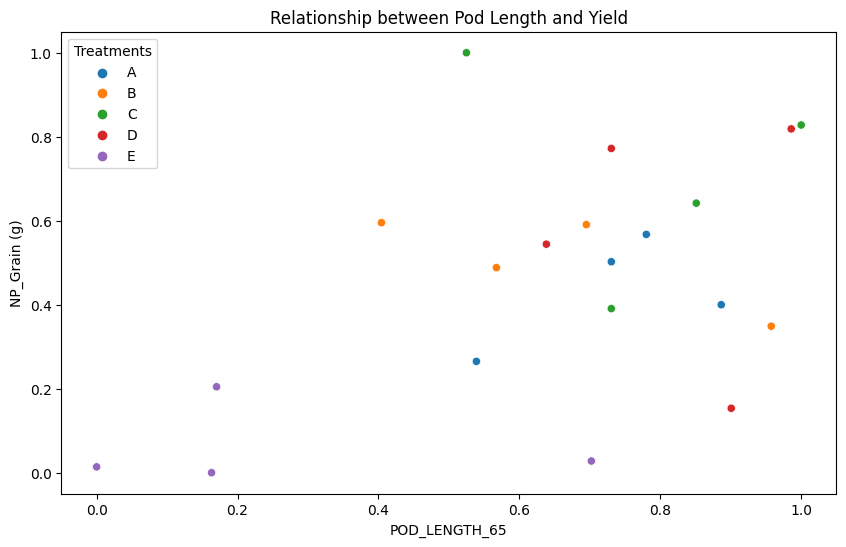

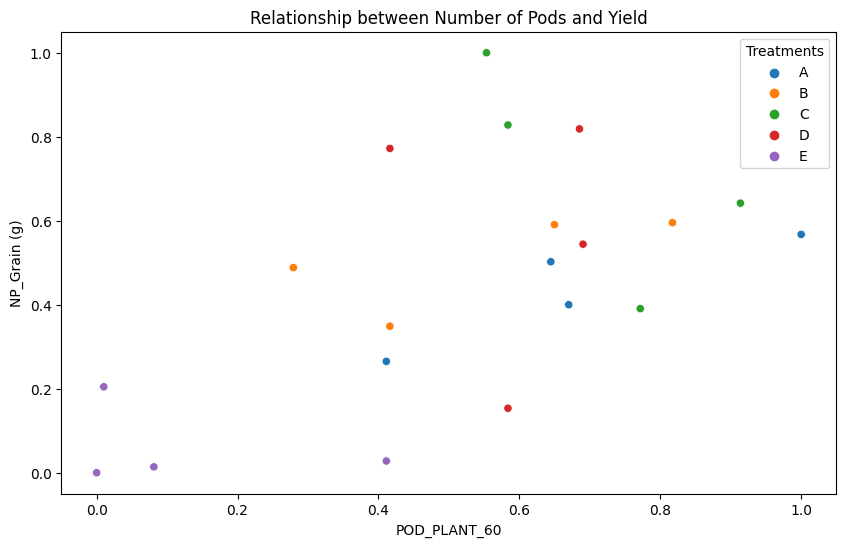

In [94]:
# Relationship between pod length and yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POD_LENGTH_65', y='NP_Grain (g)', hue='Treatments', data=cowpea_yield_df)
plt.title('Relationship between Pod Length and Yield')
plt.show()

# Relationship between number of pods and yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POD_PLANT_60', y='NP_Grain (g)', hue='Treatments', data=cowpea_yield_df)
plt.title('Relationship between Number of Pods and Yield')
plt.show()

### Infestatation Observation

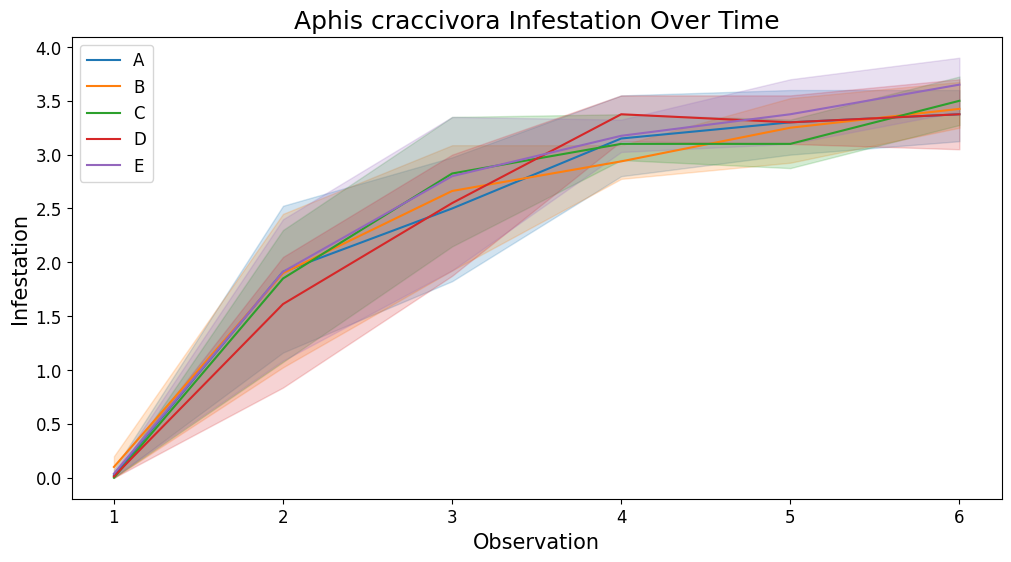

In [82]:
aphis_columns = [col for col in df.columns if 'ACINF_OBS' in col]
aphis_data = df[['Treatments'] + aphis_columns].melt(id_vars=['Treatments'], var_name='Observation', value_name='Infestation')
aphis_data['Observation'] = aphis_data['Observation'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Observation', y='Infestation', hue='Treatments', data=aphis_data)
plt.title('Aphis craccivora Infestation Over Time', fontsize = 18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel('Observation', fontsize=15)
plt.ylabel('Infestation', fontsize=15)
plt.legend(fontsize = 12)
plt.show()


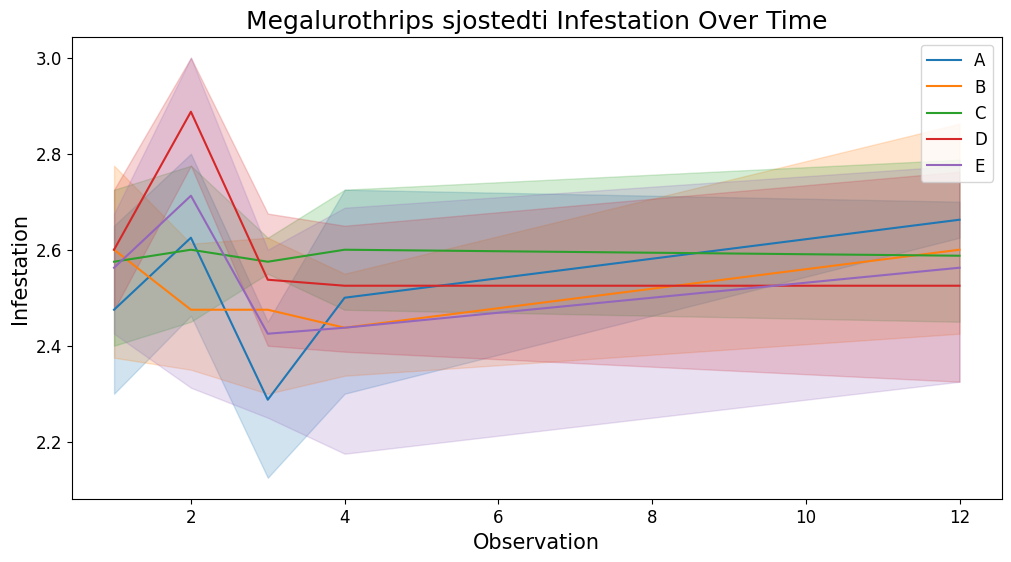

In [86]:
megalurothrips_columns = [col for col in df.columns if 'MSJ_OBS' in col]
megalurothrips_data = df[['Treatments'] + megalurothrips_columns].melt(id_vars=['Treatments'], var_name='Observation', value_name='Infestation')
megalurothrips_data['Observation'] = megalurothrips_data['Observation'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Observation', y='Infestation', hue='Treatments', data=megalurothrips_data)
plt.title('Megalurothrips sjostedti Infestation Over Time', fontsize = 18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel('Observation', fontsize=15)
plt.ylabel('Infestation', fontsize=15)
plt.legend(fontsize = 12)
plt.show()

### Statistical Analysis

In [161]:
yield_stats = df.groupby('Treatments')['NP_Grain (g)'].agg(['mean', 'median', 'std', 'min', 'max'])

yield_stats = yield_stats.round(2)

file_path = 'Table/yield_statistics_by_treatment.csv'
yield_stats.to_csv(file_path)

table = tabulate(yield_stats, headers='keys', tablefmt='pretty')
print("Yield Statistics by Treatment:")
print(table)



Yield Statistics by Treatment:
+------------+-------+--------+--------+-------+-------+
| Treatments | mean  | median |  std   |  min  |  max  |
+------------+-------+--------+--------+-------+-------+
|     A      | 296.5 | 304.0  |  56.7  | 224.0 | 354.0 |
|     B      | 327.5 | 342.0  | 49.76  | 260.0 | 366.0 |
|     C      | 417.5 | 426.0  | 112.27 | 278.0 | 540.0 |
|     D      | 356.0 | 393.0  | 130.61 | 176.0 | 462.0 |
|     E      | 136.5 | 119.0  | 41.29  | 110.0 | 198.0 |
+------------+-------+--------+--------+-------+-------+


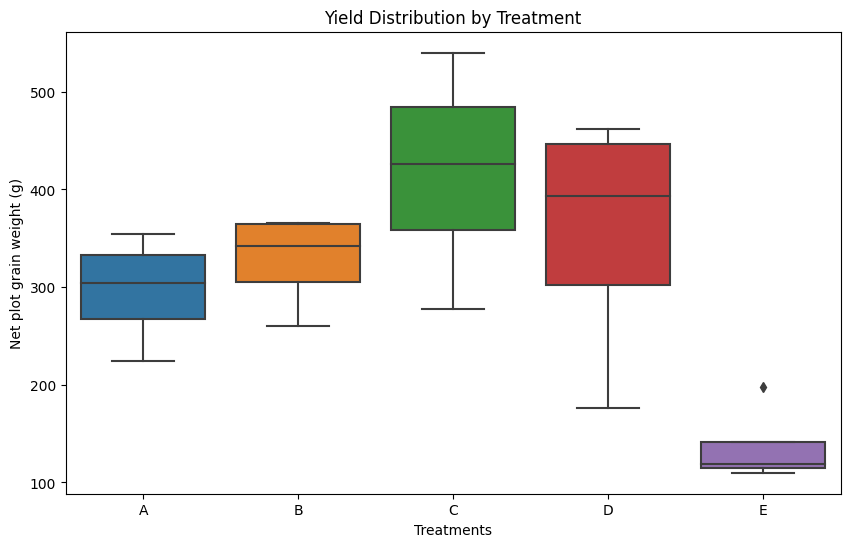

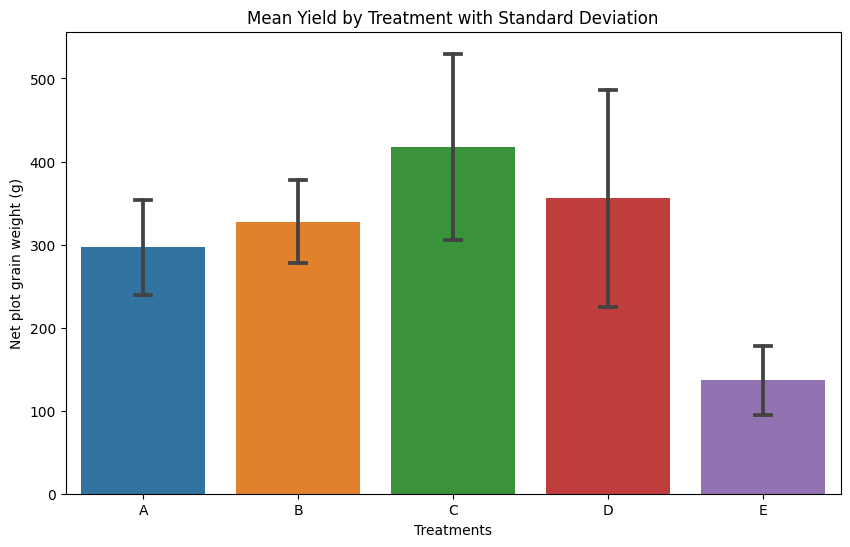

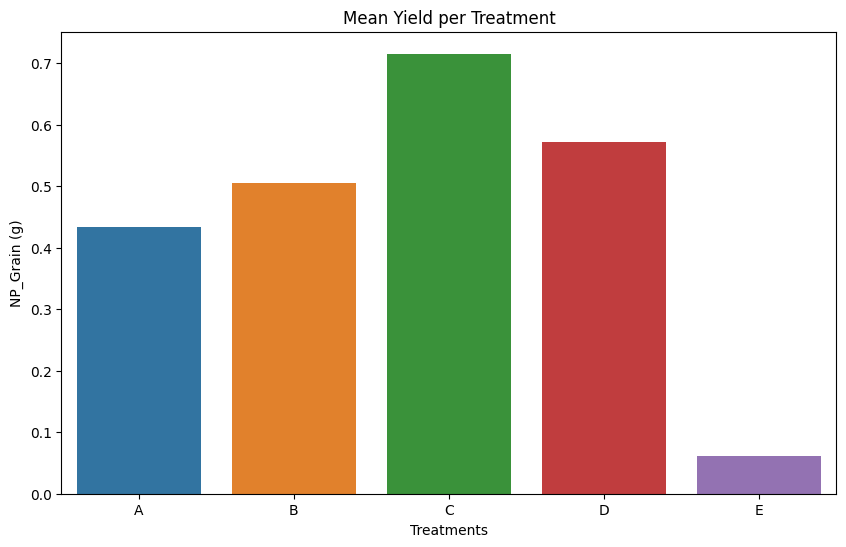

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatments', y='NP_Grain (g)', data=df)
plt.title('Yield Distribution by Treatment')
plt.ylabel('Net plot grain weight (g)')
plt.show()


# Visualize mean yields with error bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Treatments', y='NP_Grain (g)', data=df, ci='sd', capsize=0.1)
plt.title('Mean Yield by Treatment with Standard Deviation')
plt.ylabel('Net plot grain weight (g)')
plt.show()

mean_yield = cowpea_yield_df.groupby('Treatments').mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Treatments', y='NP_Grain (g)', data=mean_yield)
plt.title('Mean Yield per Treatment')
plt.show()

## ANOVA Test for significant

In [223]:
# Perform one-way ANOVA to test for significant differences between treatments
treatments = df['Treatments'].unique()
yield_data = [df[df['Treatments'] == t]['NP_Grain (g)'] for t in treatments]
f_statistic, p_value = stats.f_oneway(*yield_data)
print(f"\nOne-way ANOVA results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Save the results to a CSV file
anova_results = pd.DataFrame({
    'Metrics': ['F-statistic', 'p-value'],
    'Value': [round(f_statistic, 4), round(p_value, 4)]
})

file_path = 'Table/anova_results.csv'
anova_results.to_csv(file_path, index=False, header=True)

# Display the results using tabulate
table = tabulate(anova_results, headers='keys', tablefmt='pretty')
print("ANOVA results:")
print(table)



One-way ANOVA results:
F-statistic: 5.9653
p-value: 0.0044
ANOVA results:
+---+-------------+--------+
|   |   Metrics   | Value  |
+---+-------------+--------+
| 0 | F-statistic | 5.9653 |
| 1 |   p-value   | 0.0044 |
+---+-------------+--------+


In [ ]:
treatments = df['Treatments'].unique()
yield_data = [df[df['Treatments'] == t]['NP_Grain (g)'] for t in treatments]
f_statistic, p_value = stats.f_oneway(*yield_data)

# Print the results
print(f"\nOne-way ANOVA results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")




### Pairwise T-TEST


Pairwise t-test results:
A vs B: t-statistic = -0.8219, p-value = 0.4425
A vs C: t-statistic = -1.9242, p-value = 0.1027
A vs D: t-statistic = -0.8358, p-value = 0.4353
A vs E: t-statistic = 4.5624, p-value = 0.0038
B vs C: t-statistic = -1.4658, p-value = 0.1931
B vs D: t-statistic = -0.4078, p-value = 0.6976
B vs E: t-statistic = 5.9080, p-value = 0.0010
C vs D: t-statistic = 0.7142, p-value = 0.5019
C vs E: t-statistic = 4.6983, p-value = 0.0033
D vs E: t-statistic = 3.2048, p-value = 0.0185


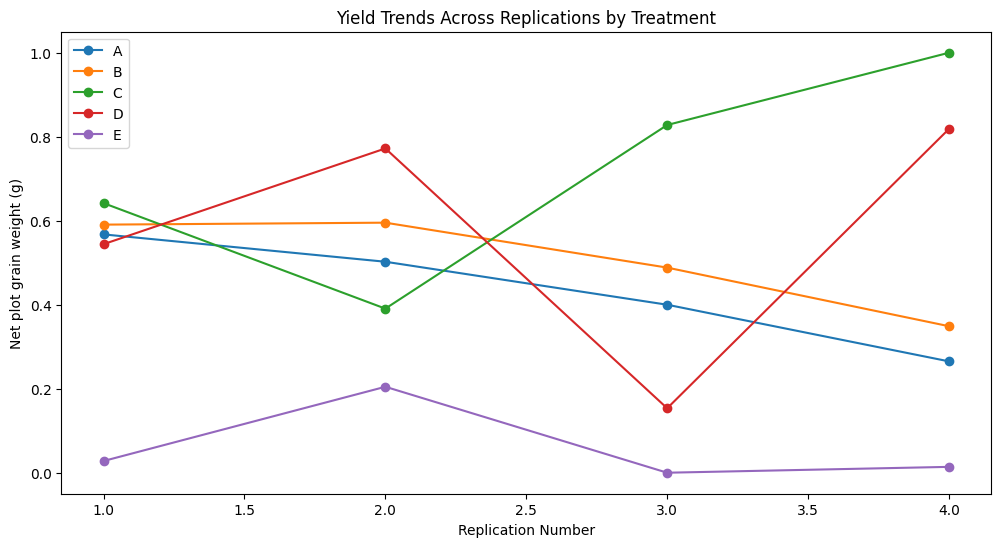

In [193]:
print("\nPairwise t-test results:")

for t1, t2 in combinations(treatments, 2):
    group1 = cowpea_yield_df[cowpea_yield_df['Treatments'] == t1]['NP_Grain (g)']
    group2 = cowpea_yield_df[cowpea_yield_df['Treatments'] == t2]['NP_Grain (g)']
    t_stat, p_val = stats.ttest_ind(group1, group2)
    print(f"{t1} vs {t2}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")



cowpea_yield_df['rep_number'] = cowpea_yield_df.groupby('Treatments').cumcount() + 1
plt.figure(figsize=(12, 6))
for treatment in treatments:
    treatment_data = cowpea_yield_df[cowpea_yield_df['Treatments'] == treatment]
    plt.plot(treatment_data['rep_number'], treatment_data['NP_Grain (g)'], marker='o', label=treatment)

plt.xlabel('Replication Number')
plt.ylabel('Net plot grain weight (g)')
plt.title('Yield Trends Across Replications by Treatment')
plt.legend()
plt.show()

In [196]:
pairwise_results = []

for t1, t2 in combinations(treatments, 2):
    group1 = cowpea_yield_df[cowpea_yield_df['Treatments'] == t1]['NP_Grain (g)']
    group2 = cowpea_yield_df[cowpea_yield_df['Treatments'] == t2]['NP_Grain (g)']
    t_stat, p_val = stats.ttest_ind(group1, group2)
    pairwise_results.append({
        'Treatment 1': t1,
        'Treatment 2': t2,
        't-statistic': round(t_stat, 4),
        'p-value': round(p_val, 4)
    })
pairwise_df = pd.DataFrame(pairwise_results)

pairwise_file_path = 'Table/pairwise_t_test_results.csv'

pairwise_df.to_csv(pairwise_file_path, index=False)
print(f"Pairwise t-test results saved to {pairwise_file_path}")


Pairwise t-test results saved to Table/pairwise_t_test_results.csv
